<a href="https://colab.research.google.com/github/sateeshkumarreddy333/FUTURE_ML_01/blob/main/Superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset (replace with the name you uploaded)
df = pd.read_csv("/Superstore.csv.csv", encoding="latin1")

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Convert order date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate daily sales
daily = df.groupby('Order Date', as_index=False)['Sales'].sum()

# Prophet requires columns named ds (date) and y (value)
daily.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

daily.head()


,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [ ]:
from prophet import Prophet

# Initialize model
m = Prophet(yearly_seasonality=True, weekly_seasonality=True)

# Fit model
m.fit(daily)

# Make future dates (next 90 days forecast)
future = m.make_future_dataframe(periods=90)

# Predict
forecast = m.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfbw5bh6m/qz779oz2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfbw5bh6m/etmz3jht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8577', 'data', 'file=/tmp/tmpfbw5bh6m/qz779oz2.json', 'init=/tmp/tmpfbw5bh6m/etmz3jht.json', 'output', 'file=/tmp/tmpfbw5bh6m/prophet_model08lo4d18/prophet_model-20250825162728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1322,2018-03-26,3010.872860,392.622360,5706.980219
1323,2018-03-27,2362.910067,-369.764093,5023.655273
1324,2018-03-28,1429.819906,-1183.055593,4185.179231
1325,2018-03-29,2562.436196,-115.966747,5264.662708
1326,2018-03-30,2764.223004,21.608977,5506.997428


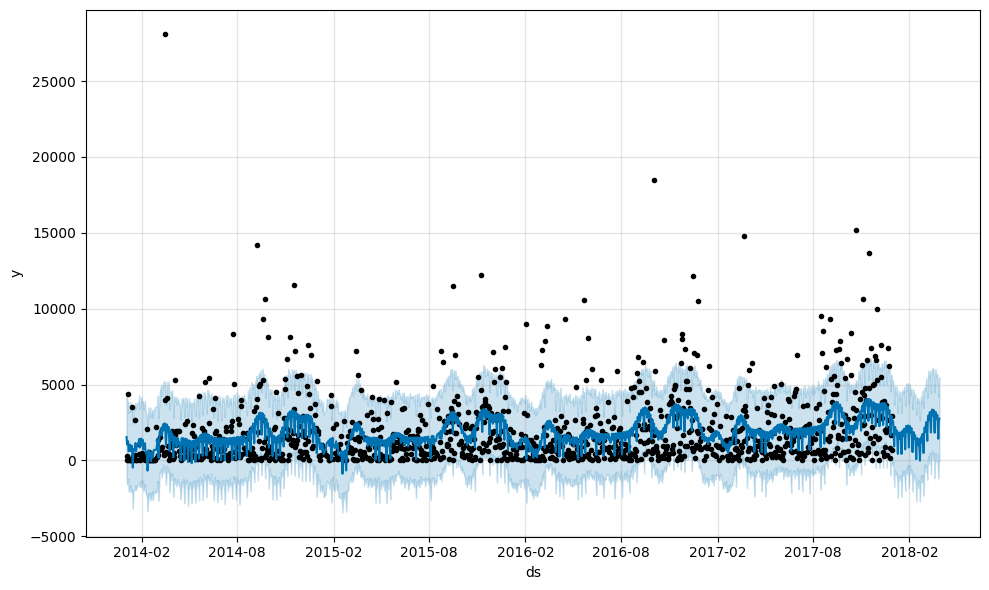

In [ ]:
import matplotlib.pyplot as plt

fig1 = m.plot(forecast)
plt.show()


In [ ]:
forecast_export = forecast[['ds','yhat','yhat_lower','yhat_upper']].copy()

forecast_export.rename(columns={
    'ds': 'date',
    'yhat': 'forecast',
    'yhat_lower': 'forecast_lower',
    'yhat_upper': 'forecast_upper'
}, inplace=True)

forecast_export.to_csv("forecast_export.csv", index=False)


In [ ]:
# List all CSV files in the current folder
import os
os.listdir()


['.config', 'forecast_export.csv', 'sample_data']

In [ ]:
from google.colab import files
files.download("forecast_export.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>